In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
df=pd.read_csv("DataMeteo12 Complet.csv")

In [5]:
print(df)

          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0   
1          2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0   
2          3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0   
3          4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0   
4          5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   14.0  21.0  3.0  27.0  400.0  72.0   
35060  35061  2017      2   28    20   18.0  27.0  3.0  37.0  400.0  59.0   
35061  35062  2017      2   28    21   15.0  39.0  5.0  50.0  600.0  41.0   
35062  35063  2017      2   28    22   11.0  35.0  6.0  49.0  500.0  41.0   
35063  35064  2017      2   28    23   10.0  28.0  7.0  48.0  600.0  39.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.5  102

In [6]:
df.shape

(35064, 18)

In [7]:
df.columns


Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [8]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan
35063,35064,2017,2,28,23,10.0,28.0,7.0,48.0,600.0,39.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Nongzhanguan


In [9]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

df.set_index('datetime', inplace=True)

df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [10]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [11]:
print(df[features])

                     PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
datetime                                                                       
2013-03-01 00:00:00    5.0  14.0  4.0  12.0  200.0  85.0  -0.5  1024.5 -21.4   
2013-03-01 01:00:00    8.0  12.0  6.0  14.0  200.0  84.0  -0.7  1025.1 -22.1   
2013-03-01 02:00:00    3.0   6.0  5.0  14.0  200.0  83.0  -1.2  1025.3 -24.6   
2013-03-01 03:00:00    5.0   5.0  5.0  14.0  200.0  84.0  -1.4  1026.2 -25.5   
2013-03-01 04:00:00    5.0   5.0  6.0  21.0  200.0  77.0  -1.9  1027.1 -24.5   
...                    ...   ...  ...   ...    ...   ...   ...     ...   ...   
2017-02-28 19:00:00   14.0  21.0  3.0  27.0  400.0  72.0  12.5  1013.5 -16.2   
2017-02-28 20:00:00   18.0  27.0  3.0  37.0  400.0  59.0  11.6  1013.6 -15.1   
2017-02-28 21:00:00   15.0  39.0  5.0  50.0  600.0  41.0  10.8  1014.2 -13.3   
2017-02-28 22:00:00   11.0  35.0  6.0  49.0  500.0  41.0  10.5  1014.4 -12.9   
2017-02-28 23:00:00   10.0  28.0  7.0  4

In [12]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [13]:
df.dropna(inplace=True)  

In [14]:
df = pd.get_dummies(df, columns=['wd', 'station'])

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print the data with clusters
print(df[['No', 'cluster']])

Cluster Centers:
[[-0.5609106  -0.53265807 -0.22070655 -0.37699534 -0.45643532 -0.29919904
  -0.76374107  0.87689815 -0.94895988 -0.06392527  0.39447069]
 [ 1.45824947  1.39710426  1.24298497  1.38390724  1.47349219 -0.71371161
  -0.7802579   0.45286671 -0.34419748 -0.07505465 -0.54472186]
 [-0.20180503 -0.18982479 -0.36563103 -0.29342594 -0.27430497  0.51211203
   0.87511701 -0.82703596  0.8346634   0.0846423  -0.06302135]]
                        No  cluster
datetime                           
2013-03-01 00:00:00      1        0
2013-03-01 01:00:00      2        0
2013-03-01 02:00:00      3        0
2013-03-01 03:00:00      4        0
2013-03-01 04:00:00      5        0
...                    ...      ...
2017-02-28 19:00:00  35060        0
2017-02-28 20:00:00  35061        0
2017-02-28 21:00:00  35062        0
2017-02-28 22:00:00  35063        0
2017-02-28 23:00:00  35064        0

[33114 rows x 2 columns]


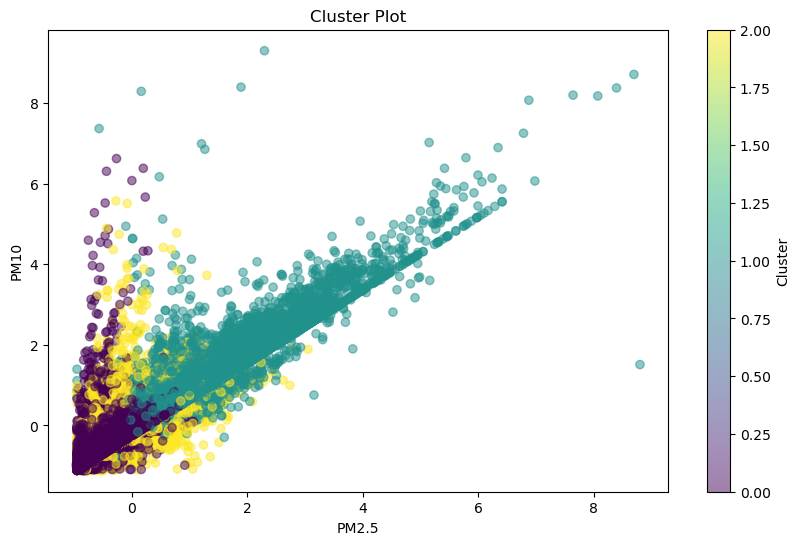

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PM2.5'], df['PM10'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('Cluster Plot')
plt.colorbar(label='Cluster')
plt.show()

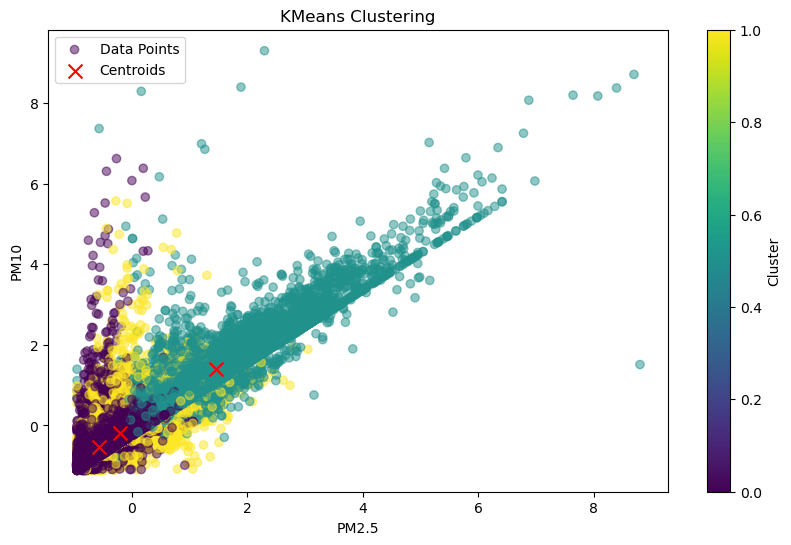

In [18]:
plt.figure(figsize=(10, 6))

plt.scatter(df['PM2.5'], df['PM10'], c=df['cluster'], cmap='viridis', alpha=0.5, label='Data Points')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

# Assuming you have already instantiated and fitted your KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

# Calculate silhouette score
silhouette_avg = silhouette_score(df[features], df['cluster'])
print("The average silhouette_score is :", silhouette_avg)


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The average silhouette_score is : 0.28458271356013404
